<a href="https://colab.research.google.com/github/abhikr1302/ML-Capstone-Health-Insurance-Cross-sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :Yes : Customer got his/her vehicle damaged in the past. No : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **1.Importing Libraries and dataset**

In [403]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [404]:
#Importing libraries for data handeling
import pandas as pd
import numpy as np
from numpy import math
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Machine Learning libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Encoders
from category_encoders import BinaryEncoder

In [405]:
 #importing the drive
 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [406]:
#Loading File

df=pd.read_csv('/content/drive/MyDrive/ML Capstone Project-Health Insurance Cross Sales/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **2.Data Study**

In [407]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [408]:
df.shape

(381109, 12)

As we can see, our data set contains 381109 rows and 12 columns.


In [409]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


We have 4 numeric and 5 categorical independent features.

In [411]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [412]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## Conclusions

1.   As we can see, our data set contains 381109 rows and 12 columns.
2.   We do not have any Null Values in our dataset.
3.   We have 4 numeric and 5 categorical independent features.

# **3.Data Cleaning**

## 3.1 Dropping column

In [413]:
#dropping the id column
df.drop(columns = 'id', inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 3.2 Checking for outliers

In [414]:
numerical_features=["Age","Annual_Premium","Vintage"]

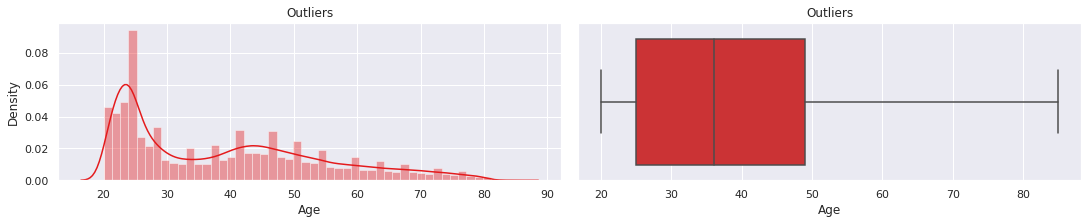

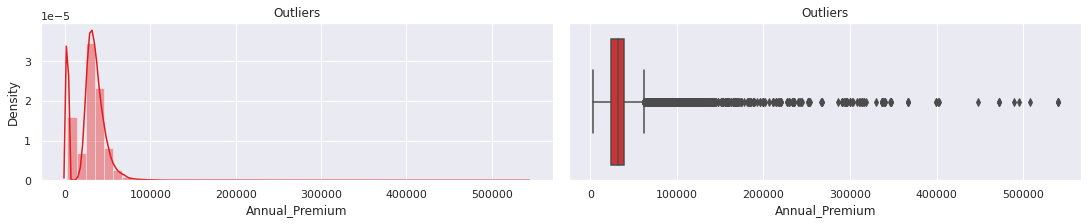

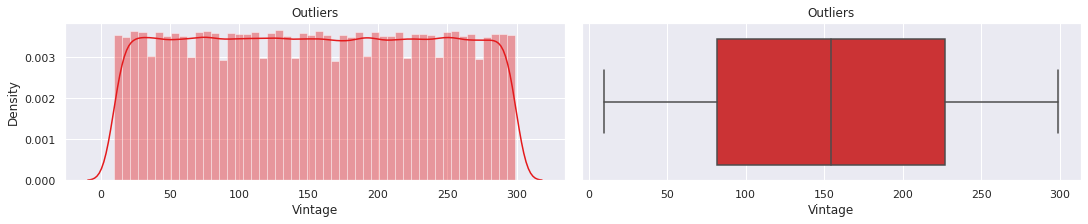

In [415]:
for col in numerical_features:  #subplotting all the values with outliers 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers")

## **3.3 Handling Outliers**

In [416]:
for col in ['Annual_Premium','Age']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,np.where(
                         df[col] < lower_cap,lower_cap,np.where(
                         df[col] > upper_cap,upper_cap,df[col]))))

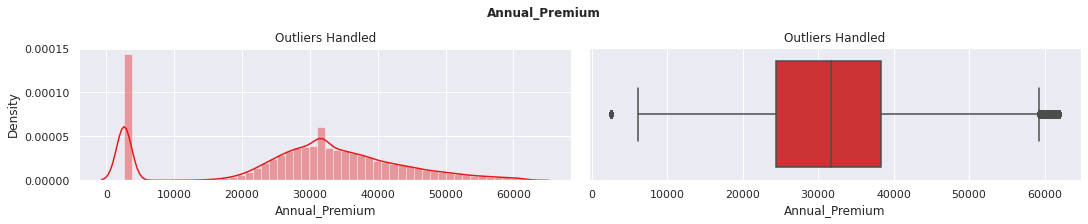

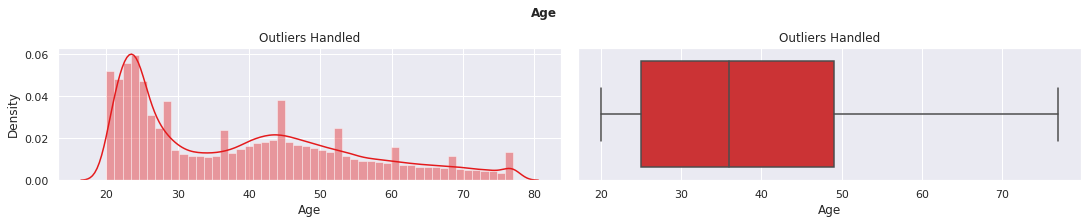

In [417]:
for col in ['Annual_Premium','Age']:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers Handled")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers Handled")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [418]:
df.nunique()

Gender                      2
Age                        58
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          41667
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

##**3.4 Correlation**

Text(0.5, 1.05, 'Heat Corelation Map')

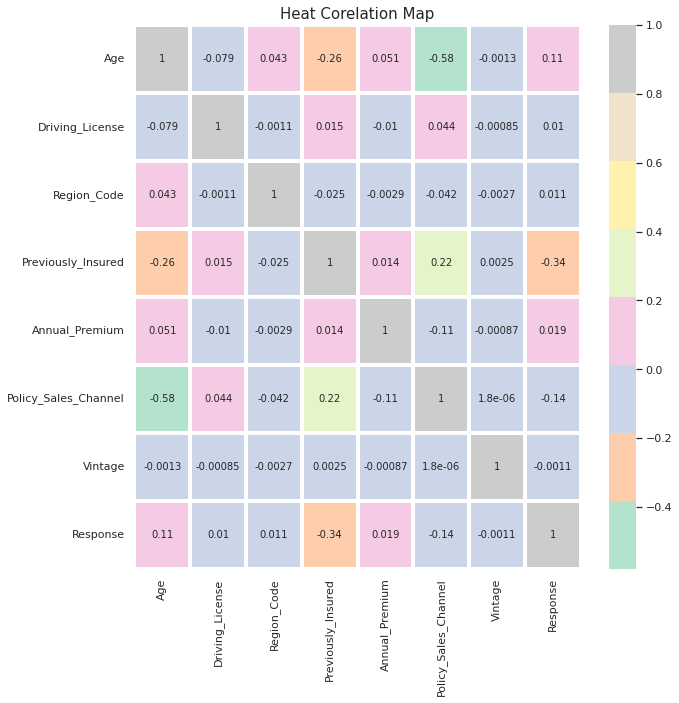

In [419]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='Pastel2')

plt.title("Heat Corelation Map", y=1.05, size=15)

#**4. EDA**

In [420]:
features = df.loc[ : , df.columns != 'Response']

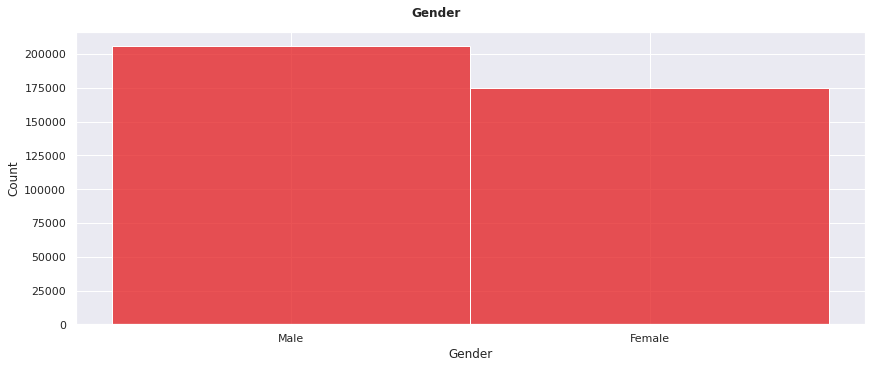

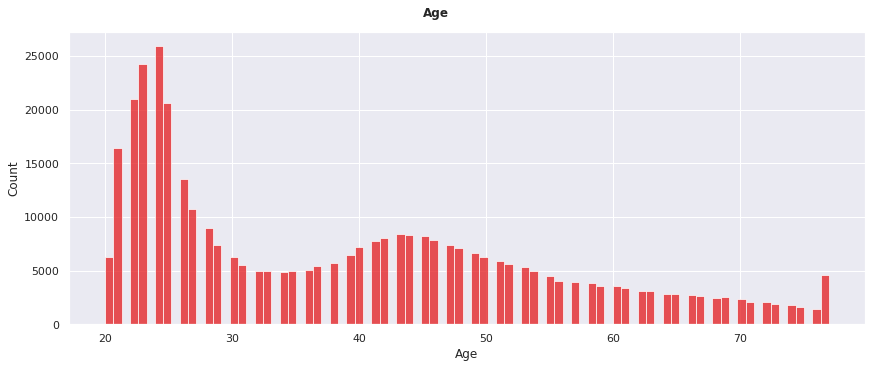

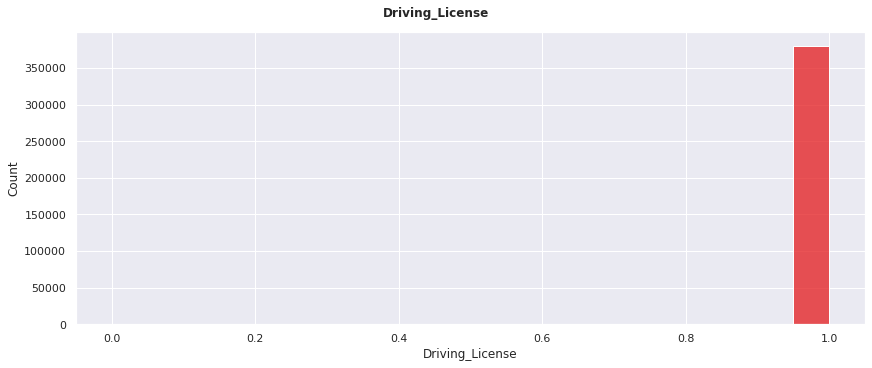

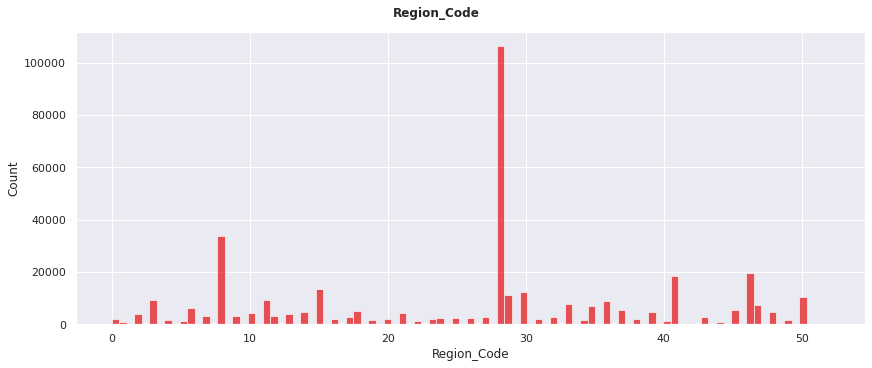

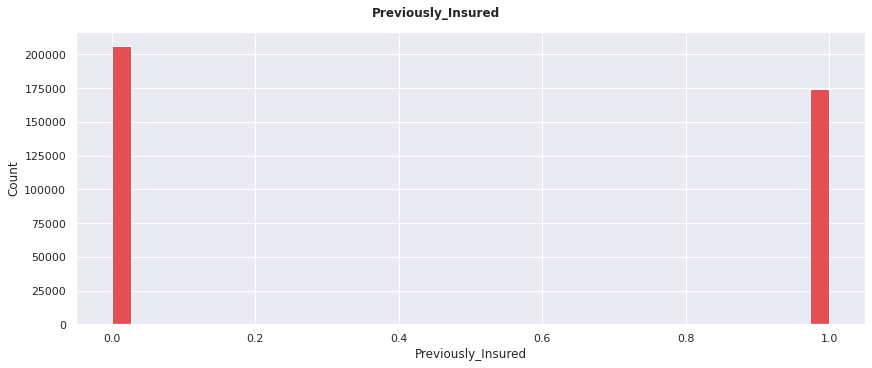

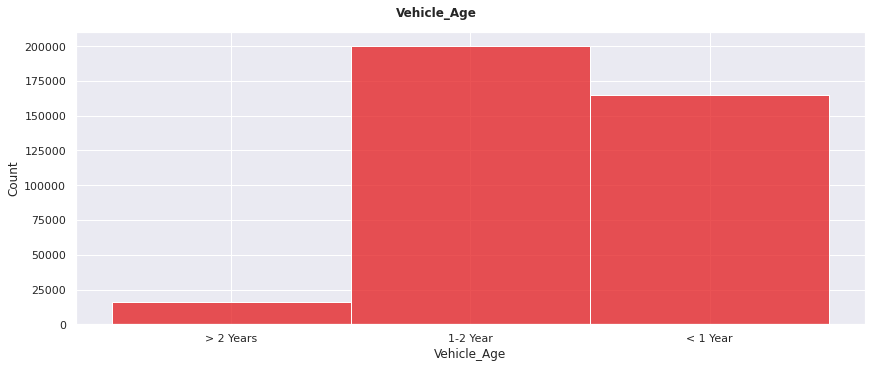

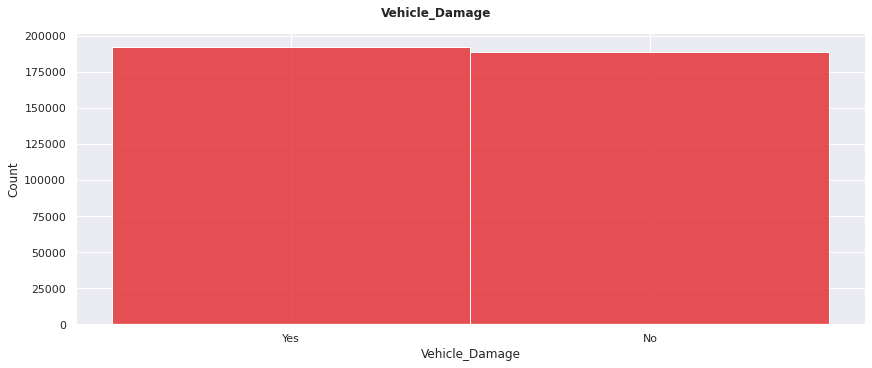

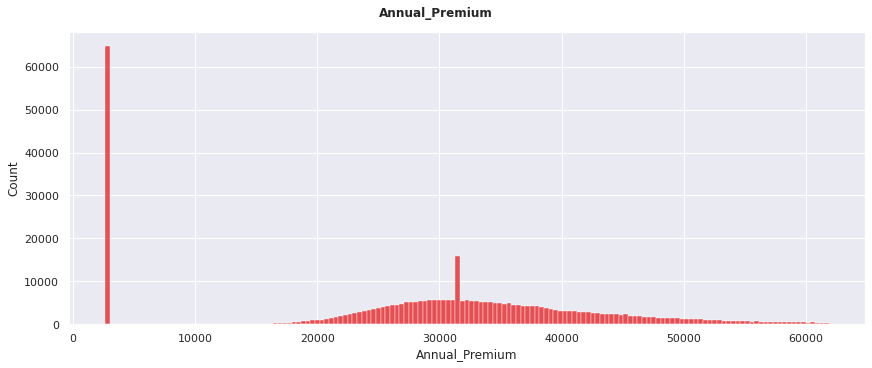

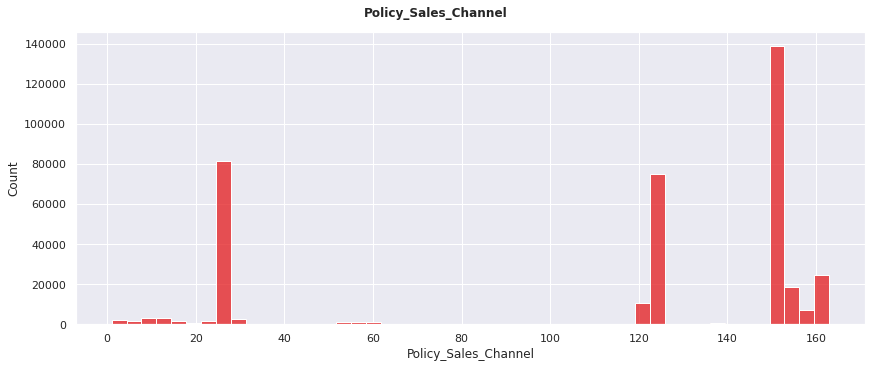

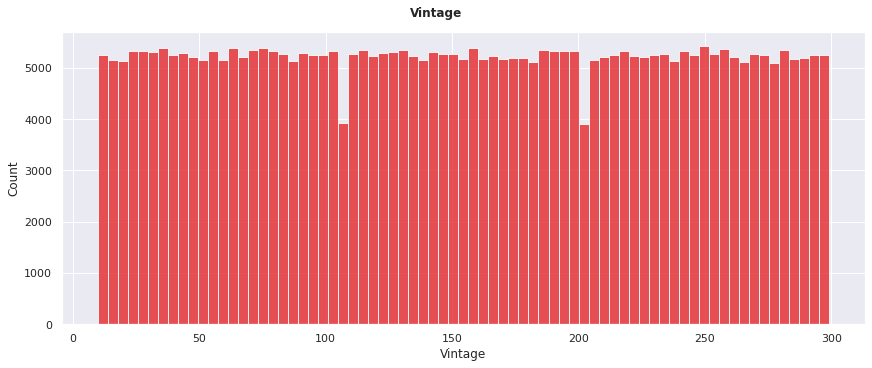

In [421]:
for col in features:
  fig, ax =plt.subplots(1,1, constrained_layout=True)
  fig.set_size_inches(12, 5)
  sns.histplot(df[col])
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

**Gender Vs Response**

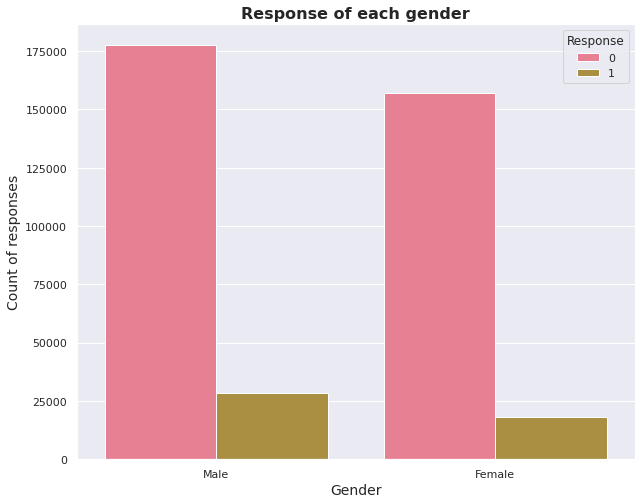

In [422]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("husl")
graph = sns.countplot(x=df['Gender'],hue=df['Response'])
graph.set_title('Response of each gender',fontsize = 16, fontweight='bold')
graph.set_xlabel('Gender',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

**Age Vs Response**

In [423]:
age=df.groupby('Age')['Response'].sum().astype(int).reset_index().sort_values(by='Response',ascending=True)
age

,Age,Response
55,75.0,106
56,76.0,108
54,74.0,144
53,73.0,158
52,72.0,169
0,20.0,171
51,71.0,172
50,70.0,193
48,68.0,220
49,69.0,232


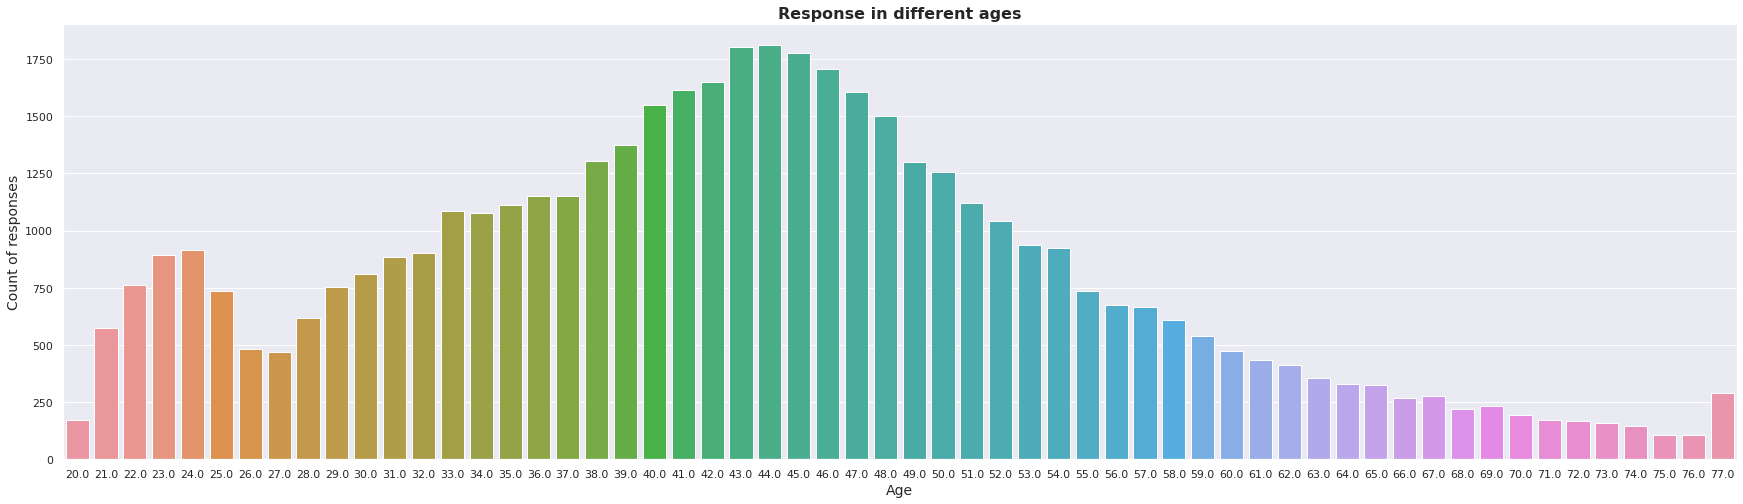

In [424]:
sns.set(rc={'figure.figsize':(30,8)})
sns.set_palette("Set1")
graph = sns.barplot(x='Age',y='Response',data=age)
graph.set_title('Response in different ages',fontsize = 16, fontweight='bold')
graph.set_xlabel('Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

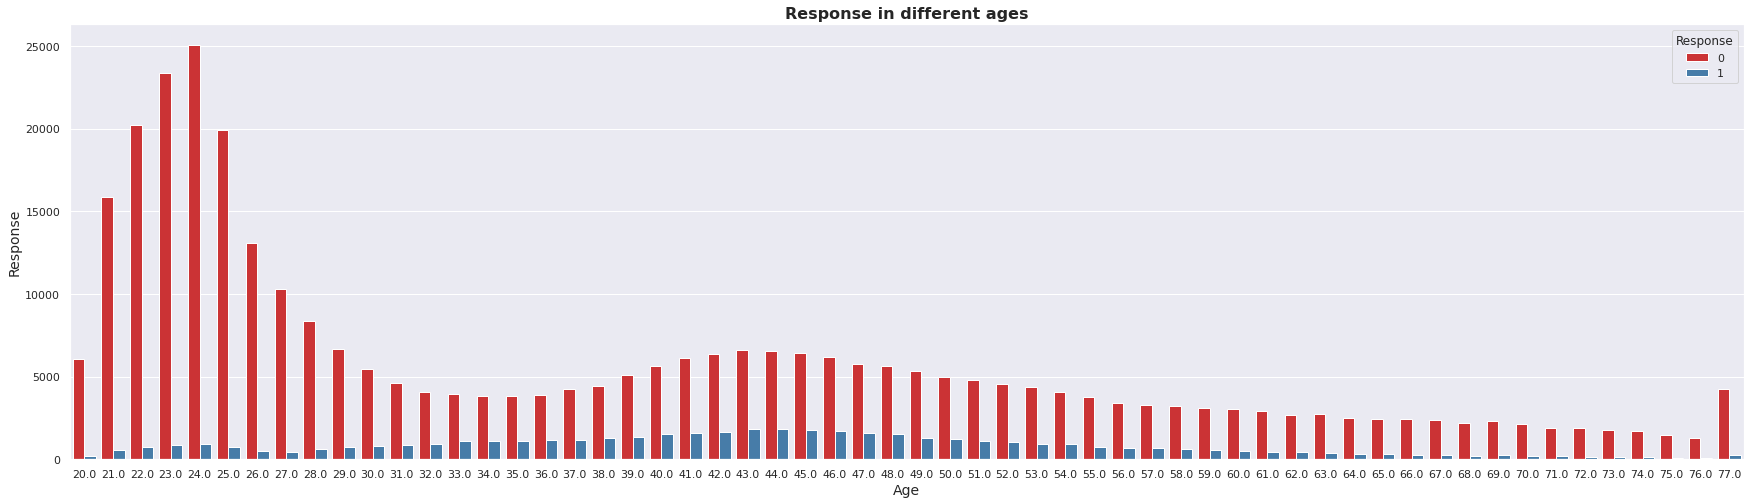

In [425]:
sns.set(rc={'figure.figsize':(30,8)})
sns.set_palette("Set1")
graph = sns.countplot(x='Age',hue='Response',data=df)
graph.set_title('Response in different ages',fontsize = 16, fontweight='bold')
graph.set_xlabel('Age',fontsize = 14)
graph.set_ylabel('Response',fontsize = 14)
plt.show()

In [426]:
df['Age_Group'] = df['Age'].apply(lambda x:'Young Age' if x >= 20 and x<=40 else 'Middle Age' if x>40 and x<=60 else 'Old Age')

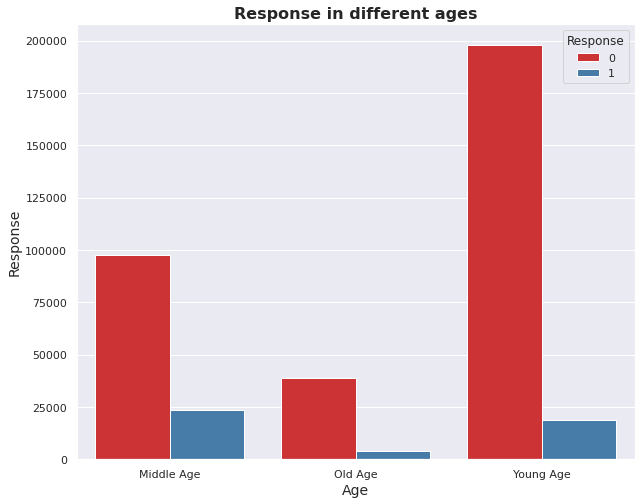

In [427]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.countplot(x='Age_Group',hue='Response',data=df)
graph.set_title('Response in different ages',fontsize = 16, fontweight='bold')
graph.set_xlabel('Age',fontsize = 14)
graph.set_ylabel('Response',fontsize = 14)
plt.show()

**Driving license**

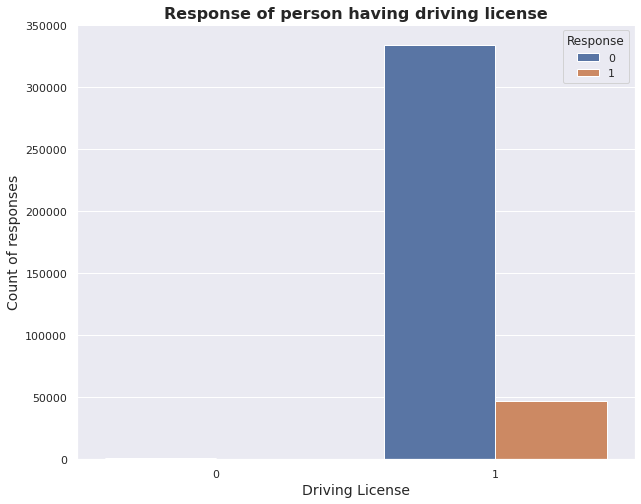

In [428]:
sns.set(rc={'figure.figsize':(10,8)})
graph = sns.countplot(x=df['Driving_License'],hue=df['Response'])
graph.set_title('Response of person having driving license',fontsize = 16, fontweight='bold')
graph.set_xlabel('Driving License',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

In [429]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

**Region Vs Response**

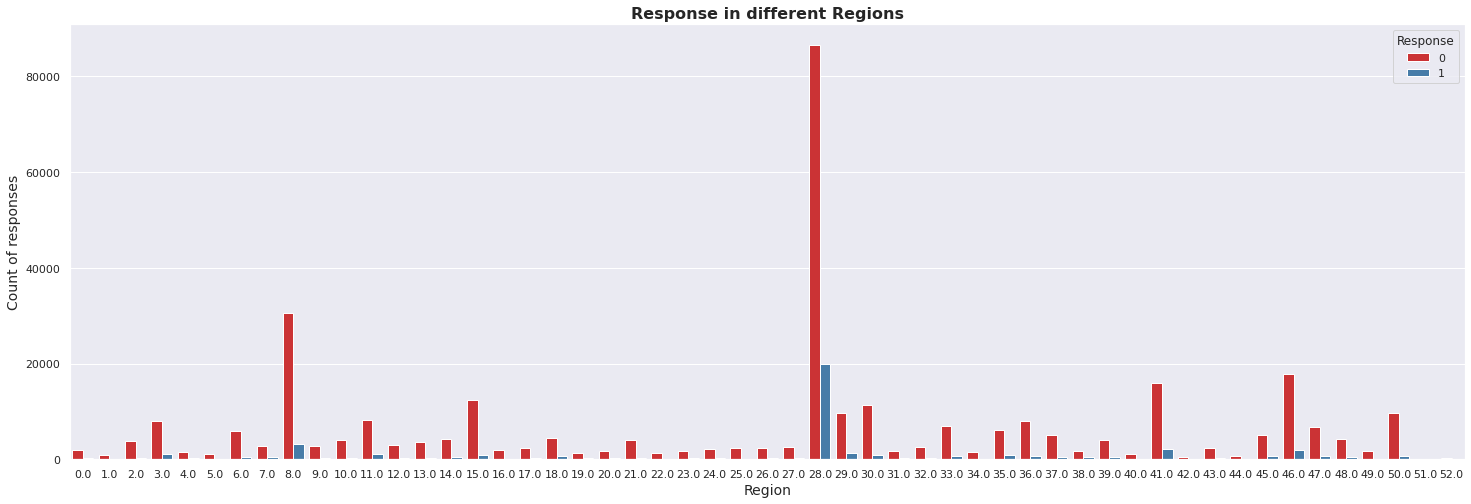

In [430]:
sns.set(rc={'figure.figsize':(25,8)})
sns.set_palette("Set1")
graph = sns.countplot(x=df['Region_Code'],hue=df['Response'])
graph.set_title('Response in different Regions',fontsize = 16, fontweight='bold')
graph.set_xlabel('Region',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

In [451]:
be = BinaryEncoder()
be_enc = be.fit_transform(df['Region_Code'])

In [452]:
enc_df = pd.concat([df,be_enc],axis=1)
enc_df.sample(frac=1).head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Group,Vintage_Group,Region_Code
121746,1,64.0,1,28.0,0,2,0,44760.0,55.0,94,0,3,5,1,28.0
148159,1,41.0,1,33.0,0,2,1,34870.0,124.0,67,0,2,4,1,33.0
266524,0,21.0,1,39.0,1,1,0,31978.0,160.0,241,0,1,4,3,39.0
222168,1,33.0,1,28.0,0,2,1,2630.0,124.0,90,0,1,1,1,28.0
285126,1,23.0,1,36.0,1,1,0,38281.0,152.0,254,0,1,4,3,36.0
66915,1,39.0,1,18.0,0,2,1,38242.0,124.0,152,0,1,4,2,18.0
55346,1,31.0,1,29.0,0,1,1,2630.0,163.0,103,0,1,1,2,29.0
118085,0,28.0,1,27.0,1,1,0,27370.0,152.0,242,0,1,3,3,27.0
50769,1,44.0,1,28.0,0,2,1,49632.0,124.0,125,0,2,5,2,28.0
250748,0,23.0,1,45.0,1,1,0,42625.0,152.0,259,0,1,5,3,45.0


We have done Binary Encoding to convert the nominal data into binary format

**Previously Insured**

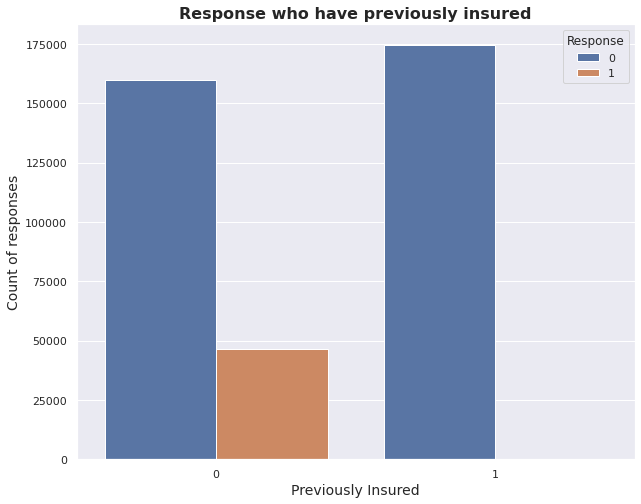

In [432]:
sns.set(rc={'figure.figsize':(10,8)})
graph = sns.countplot(x=df['Previously_Insured'],hue=df['Response'])
graph.set_title('Response who have previously insured',fontsize = 16, fontweight='bold')
graph.set_xlabel('Previously Insured',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

**Vehicle Age Vs Response**

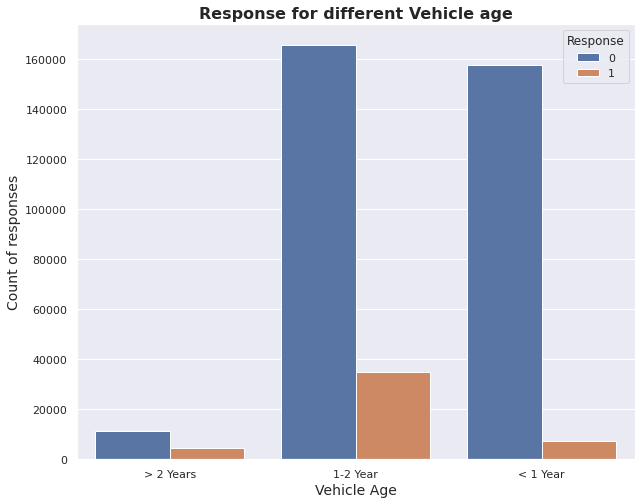

In [434]:
sns.set(rc={'figure.figsize':(10,8)})
graph = sns.countplot(x=df['Vehicle_Age'],hue=df['Response'])
graph.set_title('Response for different Vehicle age',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

**Vehicle Damage**

Text(0, 0.5, 'Count of responses')

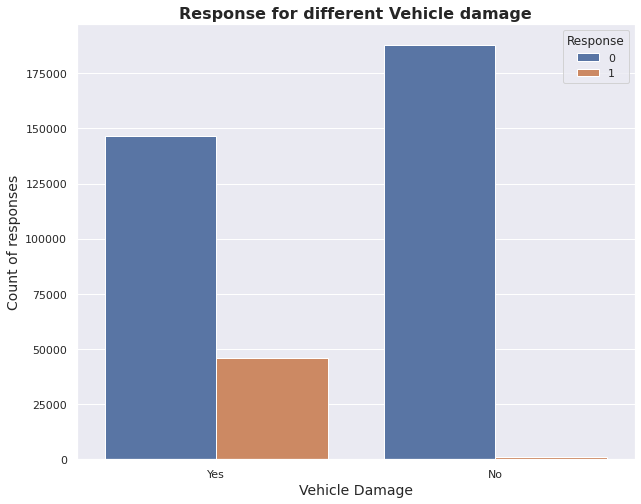

In [435]:
sns.set(rc={'figure.figsize':(10,8)})
graph = sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'])
graph.set_title('Response for different Vehicle damage',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Damage',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)

In [436]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

**Annual Premium**

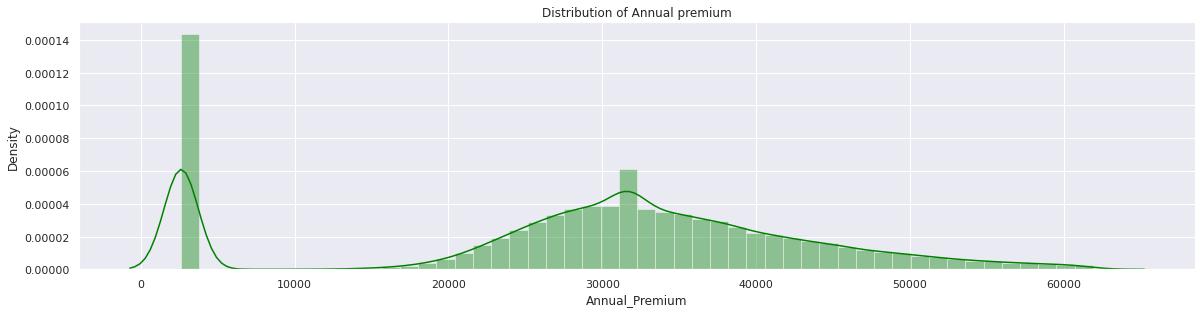

In [437]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

In [438]:
df['Annual_Premium_Group'] = df['Annual_Premium'].apply(lambda x:'Very Low Premium' if x <= 10000 else 'Low Premium' if x>10000 and x<=20000 else 'Medium Premium' if x>20000 and x<=30000 else 'High Premium' if x>30000 and x<=40000 else 'Very High Premium')

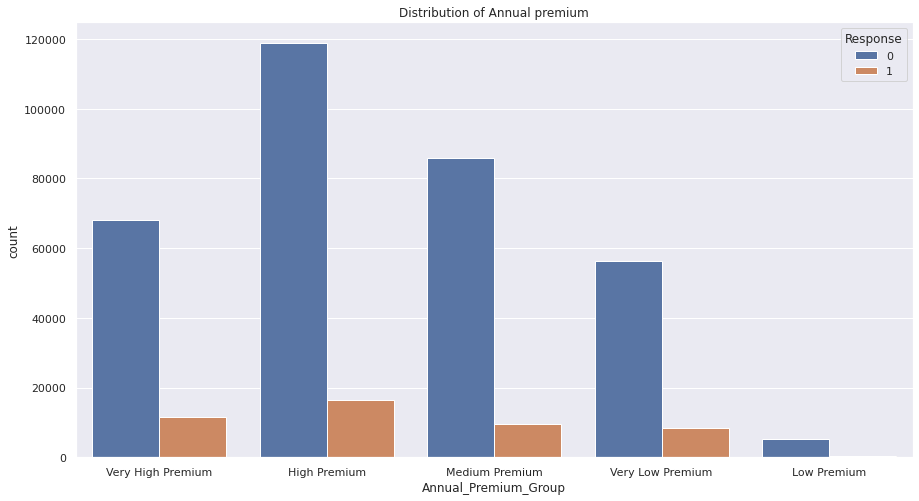

In [439]:
plt.figure(figsize=(15,8))
sns.countplot(x= df['Annual_Premium_Group'], hue=df['Response'])
plt.title("Distribution of Annual premium")
plt.show()

**Policy Sales Channel**

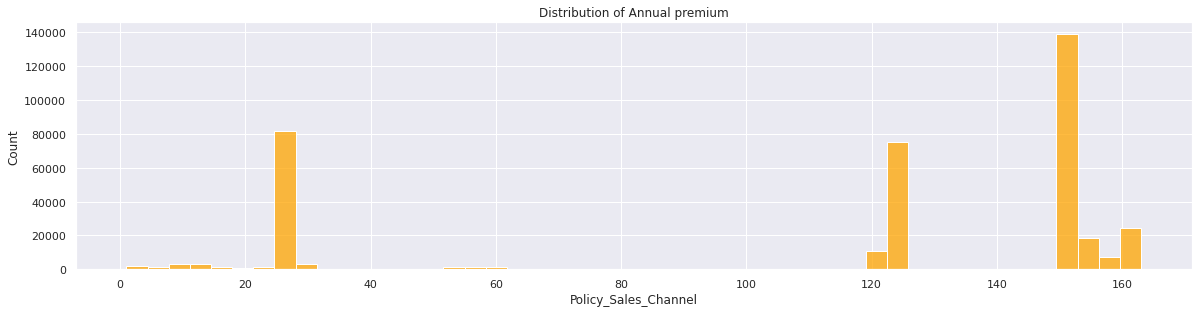

In [455]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(df['Policy_Sales_Channel'], color='orange')
plt.title("Distribution of Annual premium")
plt.show()

In [463]:
 df['Policy_Sales_Channel_Group'] = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>80000 else 'Channel_B' if 40000<x<80000 else 'Channel_C' if 20000<x<=40000 else 'Channel D')

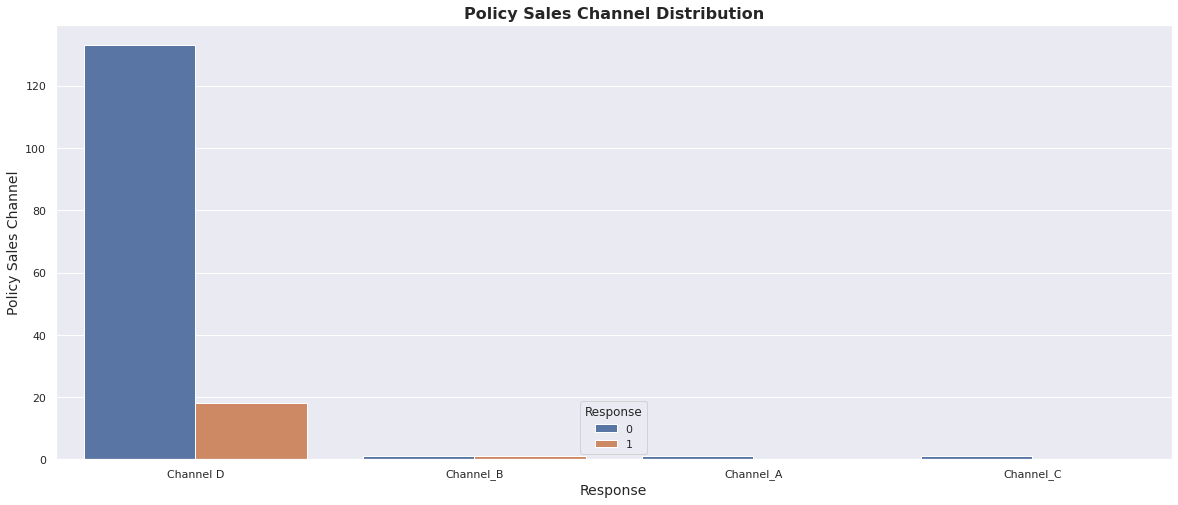

In [464]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x = 'Policy_Sales_Channel_Group', data = df, hue='Response')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Policy Sales Channel', fontdict={'fontsize': 14})
plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.show()

**Vintage Vs Response**

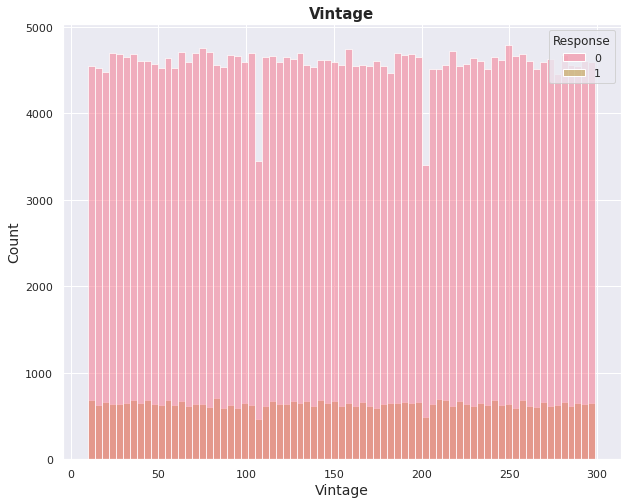

In [441]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("husl")
sns.histplot(x = df['Vintage'], hue=df['Response'])
plt.xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

In [442]:
df['Vintage_Group'] = df['Vintage'].apply(lambda x:'New Customer' if x <= 100 else 'Intermediate Customer' if x>100 and x<=200 else 'Old Customer')

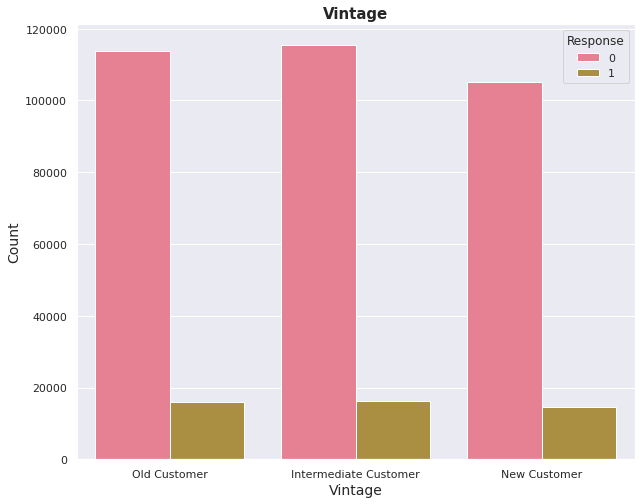

In [443]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("husl")
sns.countplot(x = df['Vintage_Group'], hue=df['Response'])
plt.xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

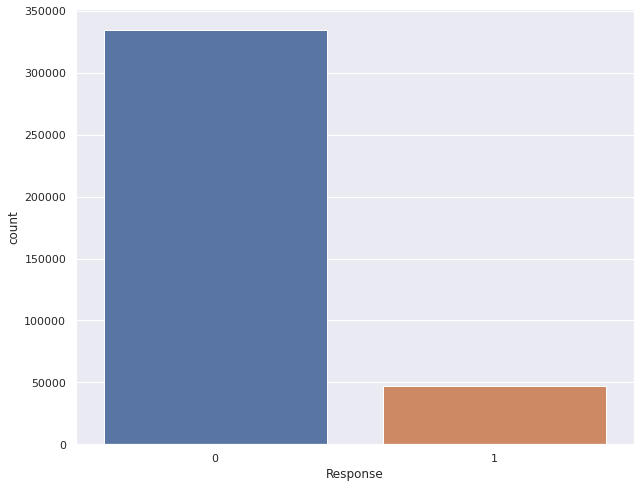

In [444]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'])

# **5. Data Processing**

**Label Encoding**

In [445]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Age_Group'] = df['Age_Group'].apply(lambda x: 1 if x == 'Young Age' else 2 if x == 'Middle Age' else 3)
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 0 if x == 'No' else 1)
df['Vintage_Group'] = df['Vintage_Group'].apply(lambda x: 1 if x == 'New Customer' else 2 if x == 'Intermediate Customer' else 3)
df['Annual_Premium_Group'] = df['Annual_Premium_Group'].apply(lambda x: 1 if x == 'Very Low Premium' else 2 if x == 'Low Premium' else 3 if x== 'Medium Premium' else 4 if x== 'High Premium' else 5)

**Separating Dependent and Independent Data**

In [446]:
x=df.drop(['Response','Age','Vintage','Annual_Premium'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

We are removing 'Age', 'Annual Premium' and 'Vintage' as it has been grouped into separate columns

**Feature Selection**

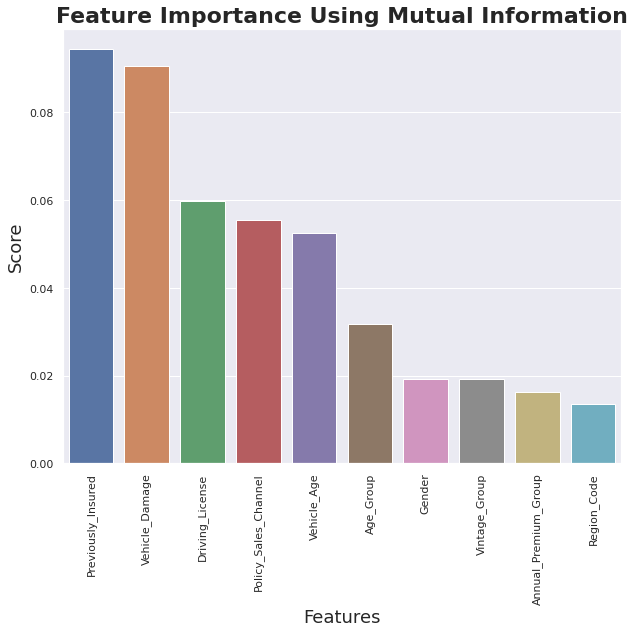

In [447]:
from sklearn.feature_selection import mutual_info_classif
def mutual_info(df):
    X = x
    Y = y
    
    X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2)

    high_score_features = []
    feature_scores = mutual_info_classif( X_train, Y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(df)

**Handling Imbalanced Data**

In [448]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)